# Galaxy vs Nurse - Finalna Wizualizacja Trendów

## Cel:
Wizualizacja finalnych wyników analizy trendów stresu:
- **Galaxy Wearables** (dane laboratoryjne)
- **Nurse Stress** (dane z realnego miejsca pracy)

## ⚠️ UWAGA:
Ten notebook wczytuje TYLKO gotowe wyniki z `results/individual_trends_results.csv`.

**NIE** wczytujemy surowych danych Galaxy ani Nurse.

**NIE** przeliczamy trendów - używamy gotowych wyników analizy.

## KROK 1: Wczytanie wyników

In [1]:
# 🔹 WCZYTYWANIE GOTOWYCH WYNIKÓW
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Style wizualizacji
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Ścieżka do wyników
RESULTS_PATH = Path("results")
RESULTS_CSV = RESULTS_PATH / "individual_trends_results.csv"

print(f"{'='*80}")
print(f"KROK 1: WCZYTYWANIE WYNIKÓW")
print(f"{'='*80}")

# Wczytaj wyniki
if RESULTS_CSV.exists():
    df_results = pd.read_csv(RESULTS_CSV)
    print(f"\n✅ Wczytano wyniki: {df_results.shape}")
    print(f"   Kolumny: {list(df_results.columns)}")
    
    # Sprawdź czy są wymagane kolumny
    required_cols = ['dataset', 'feature', 'change_pct']
    missing_cols = [c for c in required_cols if c not in df_results.columns]
    if missing_cols:
        print(f"\n❌ Brakuje kolumn: {missing_cols}")
    else:
        print(f"✅ Wszystkie wymagane kolumny są obecne")
    
    # Sprawdź datasety
    datasets = df_results['dataset'].unique()
    print(f"\n   Datasety: {list(datasets)}")
    print(f"   Rozkład per dataset:")
    print(df_results['dataset'].value_counts())
    
    # Sprawdź cechy
    features = df_results['feature'].unique()
    print(f"\n   Cechy: {list(features)}")
    
    # Pokaż pierwsze wiersze
    print(f"\n   Przykładowe dane (pierwsze 5 wierszy):")
    print(df_results.head().to_string())
else:
    print(f"\n❌ Plik nie istnieje: {RESULTS_CSV}")
    print(f"   Uruchom najpierw analizę w Galaxy_Nurse_Individual_Trends.ipynb")
    df_results = None

print(f"\n{'='*80}")

KROK 1: WCZYTYWANIE WYNIKÓW

✅ Wczytano wyniki: (10, 8)
   Kolumny: ['subject', 'dataset', 'feature', 'baseline_mean', 'stress_mean', 'change_pct', 'baseline_std', 'stress_std']
✅ Wszystkie wymagane kolumny są obecne

   Datasety: ['Galaxy', 'Nurse']
   Rozkład per dataset:
dataset
Galaxy    6
Nurse     4
Name: count, dtype: int64

   Cechy: ['HRV_RMSSD', 'HRV_SDNN', 'pNN50', 'HR_mean', 'ACC_energy', 'TEMP_mean']

   Przykładowe dane (pierwsze 5 wierszy):
      subject dataset     feature  baseline_mean  stress_mean   change_pct  baseline_std  stress_std
0  Galaxy_avg  Galaxy   HRV_RMSSD      42.761494    41.409021    -3.162829             0           0
1  Galaxy_avg  Galaxy    HRV_SDNN      58.778523    45.733325   -22.193818             0           0
2  Galaxy_avg  Galaxy       pNN50      17.252589    12.839427   -25.579707             0           0
3  Galaxy_avg  Galaxy     HR_mean      74.630386    81.447247     9.134163             0           0
4  Galaxy_avg  Galaxy  ACC_energy  

## KROK 2: Wizualizacje

### 2.1: Barplot - Trendy zmian

KROK 2.1: BARPLOT - PORÓWNANIE TRENDÓW


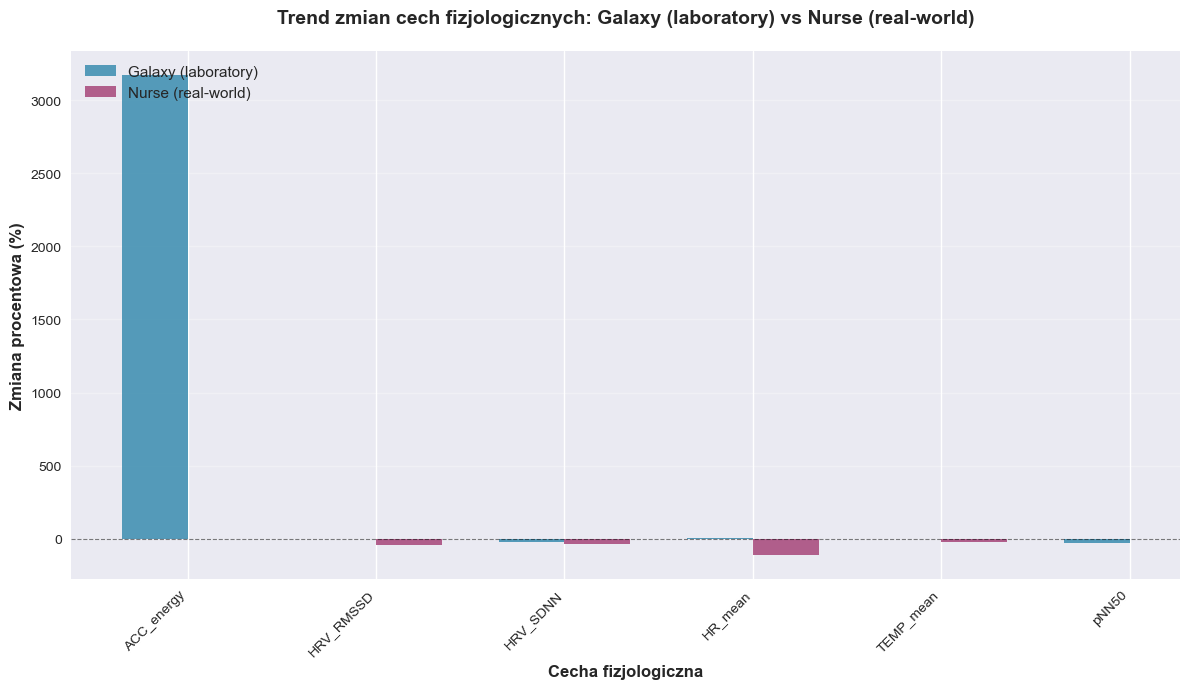


✅ Barplot wygenerowany


In [2]:
# 🔹 BARPLOT - PORÓWNANIE TRENDÓW
print(f"{'='*80}")
print(f"KROK 2.1: BARPLOT - PORÓWNANIE TRENDÓW")
print(f"{'='*80}")

if df_results is None or df_results.empty:
    print("⚠️ Brak danych do wizualizacji")
else:
    # Przygotuj dane do wykresu
    # Jeśli są indywidualne trendy per subject, użyj średnich per dataset i feature
    if 'subject' in df_results.columns:
        # Agreguj per dataset i feature (średnia change_pct)
        df_plot = df_results.groupby(['dataset', 'feature'])['change_pct'].mean().reset_index()
    else:
        df_plot = df_results[['dataset', 'feature', 'change_pct']].copy()
    
    # Sortuj cechy alfabetycznie
    features_sorted = sorted(df_plot['feature'].unique())
    
    # Przygotuj dane do wykresu
    x = np.arange(len(features_sorted))
    width = 0.35
    
    galaxy_values = []
    nurse_values = []
    
    for feat in features_sorted:
        galaxy_data = df_plot[(df_plot['dataset'] == 'Galaxy') & (df_plot['feature'] == feat)]
        nurse_data = df_plot[(df_plot['dataset'] == 'Nurse') & (df_plot['feature'] == feat)]
        
        galaxy_val = galaxy_data['change_pct'].iloc[0] if not galaxy_data.empty else np.nan
        nurse_val = nurse_data['change_pct'].iloc[0] if not nurse_data.empty else np.nan
        
        galaxy_values.append(galaxy_val)
        nurse_values.append(nurse_val)
    
    # Twórz wykres
    fig, ax = plt.subplots(figsize=(12, 7))
    
    bars1 = ax.bar(x - width/2, galaxy_values, width, label='Galaxy (laboratory)', 
                   alpha=0.8, color='#2E86AB')
    bars2 = ax.bar(x + width/2, nurse_values, width, label='Nurse (real-world)', 
                   alpha=0.8, color='#A23B72')
    
    # Linia zerowa
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    
    ax.set_xlabel('Cecha fizjologiczna', fontsize=12, fontweight='bold')
    ax.set_ylabel('Zmiana procentowa (%)', fontsize=12, fontweight='bold')
    ax.set_title('Trend zmian cech fizjologicznych: Galaxy (laboratory) vs Nurse (real-world)',
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(features_sorted, rotation=45, ha='right')
    ax.legend(fontsize=11, loc='upper left')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Barplot wygenerowany")
    print(f"{'='*80}")

### 2.2: Tabela podsumowania

In [5]:
# 🔹 TABELA PODSUMOWANIA
print(f"{'='*80}")
print(f"KROK 2.2: TABELA PODSUMOWANIA")
print(f"{'='*80}")

if df_results is None or df_results.empty:
    print("⚠️ Brak danych do tabeli")
else:
    # Przygotuj dane do tabeli
    if 'subject' in df_results.columns:
        df_table = df_results.groupby(['dataset', 'feature'])['change_pct'].mean().reset_index()
    else:
        df_table = df_results[['dataset', 'feature', 'change_pct']].copy()
    
    # Pivot do formatu: feature | Galaxy_change_pct | Nurse_change_pct
    df_pivot = df_table.pivot(index='feature', columns='dataset', values='change_pct').reset_index()
    df_pivot.columns.name = None
    
    # Dodaj kolumnę ze znakiem zmiany
    if 'Galaxy' in df_pivot.columns and 'Nurse' in df_pivot.columns:
        def get_direction_arrow(row):
            g_dir = '↑' if pd.notna(row.get('Galaxy', np.nan)) and row.get('Galaxy', 0) > 0 else '↓'
            n_dir = '↑' if pd.notna(row.get('Nurse', np.nan)) and row.get('Nurse', 0) > 0 else '↓'
            return f"{g_dir} / {n_dir}"
        
        df_pivot['Direction (Galaxy / Nurse)'] = df_pivot.apply(get_direction_arrow, axis=1)
    
    # Zmień nazwy kolumn
    df_pivot = df_pivot.rename(columns={
        'Galaxy': 'Galaxy_change_pct',
        'Nurse': 'Nurse_change_pct'
    })
    
    # Sortuj alfabetycznie po feature
    df_pivot = df_pivot.sort_values('feature').reset_index(drop=True)
    
    print(f"\n📊 TABELA PODSUMOWANIA:")
    print(f"{'='*80}")
    print(df_pivot.to_string(index=False))
    
    print(f"\n{'='*80}")

KROK 2.2: TABELA PODSUMOWANIA

📊 TABELA PODSUMOWANIA:
   feature  Galaxy_change_pct  Nurse_change_pct Direction (Galaxy / Nurse)
ACC_energy        3172.491577               NaN                      ↑ / ↓
 HRV_RMSSD          -3.162829        -45.375324                      ↓ / ↓
  HRV_SDNN         -22.193818        -33.343485                      ↓ / ↓
   HR_mean           9.134163       -107.877143                      ↑ / ↓
 TEMP_mean           1.335362        -21.255097                      ↑ / ↓
     pNN50         -25.579707               NaN                      ↓ / ↓



### 2.3: Dot Plot (opcjonalnie)

KROK 2.3: DOT PLOT


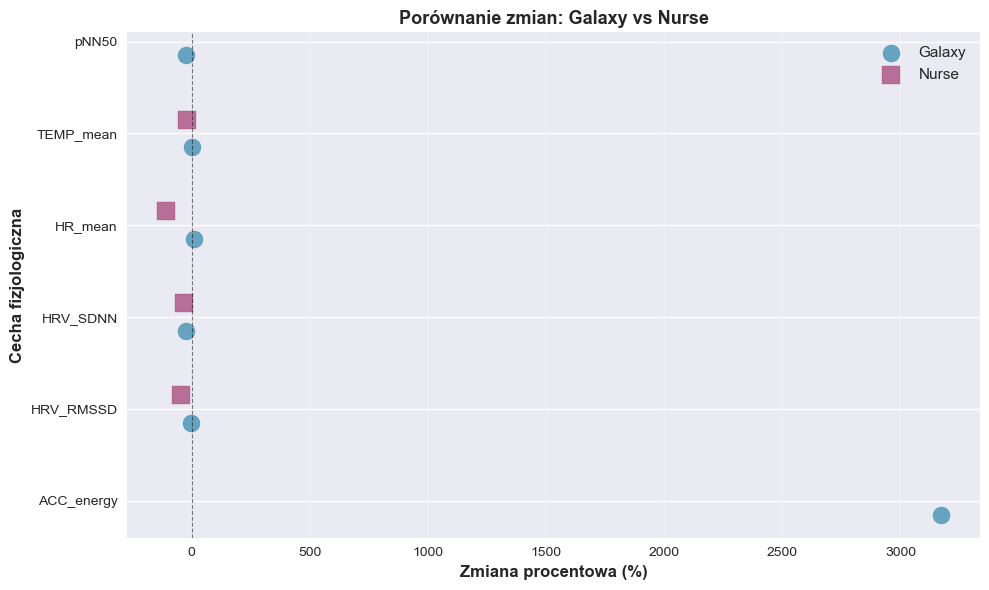


✅ Dot plot wygenerowany


In [4]:
# 🔹 DOT PLOT - OPCJONALNIE
print(f"{'='*80}")
print(f"KROK 2.3: DOT PLOT")
print(f"{'='*80}")

if df_results is None or df_results.empty:
    print("⚠️ Brak danych do dot plot")
else:
    # Przygotuj dane
    if 'subject' in df_results.columns:
        df_plot = df_results.groupby(['dataset', 'feature'])['change_pct'].mean().reset_index()
    else:
        df_plot = df_results[['dataset', 'feature', 'change_pct']].copy()
    
    # Przygotuj wykres
    fig, ax = plt.subplots(figsize=(10, 6))
    
    galaxy_data = df_plot[df_plot['dataset'] == 'Galaxy']
    nurse_data = df_plot[df_plot['dataset'] == 'Nurse']
    
    # Y pozycje (cechy)
    features_sorted = sorted(df_plot['feature'].unique())
    y_positions = {feat: idx for idx, feat in enumerate(features_sorted)}
    
    # Rysuj punkty
    for idx, row in galaxy_data.iterrows():
        y_pos = y_positions[row['feature']] - 0.15
        ax.scatter(row['change_pct'], y_pos, s=150, alpha=0.7, color='#2E86AB', 
                  label='Galaxy' if idx == galaxy_data.index[0] else '', marker='o')
    
    for idx, row in nurse_data.iterrows():
        y_pos = y_positions[row['feature']] + 0.15
        ax.scatter(row['change_pct'], y_pos, s=150, alpha=0.7, color='#A23B72', 
                  label='Nurse' if idx == nurse_data.index[0] else '', marker='s')
    
    # Linia zerowa
    ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    
    ax.set_xlabel('Zmiana procentowa (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cecha fizjologiczna', fontsize=12, fontweight='bold')
    ax.set_title('Porównanie zmian: Galaxy vs Nurse', fontsize=13, fontweight='bold')
    ax.set_yticks(range(len(features_sorted)))
    ax.set_yticklabels(features_sorted)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Dot plot wygenerowany")
    print(f"{'='*80}")

In [6]:
# 🔹 AUTOMATYCZNA ANALIZA WYNIKÓW I WNIOSKI
print(f"{'='*80}")
print(f"KROK 4: ANALIZA WYNIKÓW I WNIOSKI")
print(f"{'='*80}")

if df_results is None or df_results.empty:
    print("⚠️ Brak danych do analizy")
else:
    # Przygotuj dane do analizy
    if 'subject' in df_results.columns:
        df_analysis = df_results.groupby(['dataset', 'feature'])['change_pct'].mean().reset_index()
    else:
        df_analysis = df_results[['dataset', 'feature', 'change_pct']].copy()
    
    # Pivot do formatu porównania
    df_pivot = df_analysis.pivot(index='feature', columns='dataset', values='change_pct').reset_index()
    
    if 'Galaxy' in df_pivot.columns and 'Nurse' in df_pivot.columns:
        print(f"\n📊 ANALIZA ZMIAN PER CECHA:")
        print(f"{'-'*80}")
        
        # Dla każdej cechy analizuj zmiany
        for idx, row in df_pivot.iterrows():
            feature = row['feature']
            galaxy_change = row.get('Galaxy', np.nan)
            nurse_change = row.get('Nurse', np.nan)
            
            print(f"\n🔹 {feature}:")
            
            if pd.notna(galaxy_change):
                g_dir = "wzrost" if galaxy_change > 0 else "spadek"
                print(f"   Galaxy: {g_dir} o {abs(galaxy_change):.2f}% ({'↑' if galaxy_change > 0 else '↓'})")
            else:
                print(f"   Galaxy: brak danych")
            
            if pd.notna(nurse_change):
                n_dir = "wzrost" if nurse_change > 0 else "spadek"
                print(f"   Nurse: {n_dir} o {abs(nurse_change):.2f}% ({'↑' if nurse_change > 0 else '↓'})")
            else:
                print(f"   Nurse: brak danych")
            
            # Porównanie kierunku zmian
            if pd.notna(galaxy_change) and pd.notna(nurse_change):
                if np.sign(galaxy_change) == np.sign(nurse_change):
                    print(f"   → Zgodny kierunek zmian (oba {'wzrost' if galaxy_change > 0 else 'spadek'})")
                else:
                    print(f"   → Różny kierunek zmian (Galaxy: {'wzrost' if galaxy_change > 0 else 'spadek'}, Nurse: {'wzrost' if nurse_change > 0 else 'spadek'})")
                
                # Różnica w amplitudzie
                diff = abs(galaxy_change) - abs(nurse_change)
                if abs(diff) > 5:  # Istotna różnica > 5%
                    if diff > 0:
                        print(f"   → Galaxy ma większą amplitudę zmian (różnica: {abs(diff):.2f}%)")
                    else:
                        print(f"   → Nurse ma większą amplitudę zmian (różnica: {abs(diff):.2f}%)")
        
        # Ogólne statystyki
        print(f"\n{'='*80}")
        print(f"📈 STATYSTYKI OGÓLNE:")
        print(f"{'-'*80}")
        
        galaxy_changes = df_pivot['Galaxy'].dropna()
        nurse_changes = df_pivot['Nurse'].dropna()
        
        if not galaxy_changes.empty:
            galaxy_mean = galaxy_changes.mean()
            galaxy_std = galaxy_changes.std()
            galaxy_pos = (galaxy_changes > 0).sum()
            galaxy_neg = (galaxy_changes < 0).sum()
            print(f"\nGalaxy:")
            print(f"   Średnia zmiana: {galaxy_mean:.2f}% ± {galaxy_std:.2f}%")
            print(f"   Wzrosty: {galaxy_pos}, Spadki: {galaxy_neg}")
        
        if not nurse_changes.empty:
            nurse_mean = nurse_changes.mean()
            nurse_std = nurse_changes.std()
            nurse_pos = (nurse_changes > 0).sum()
            nurse_neg = (nurse_changes < 0).sum()
            print(f"\nNurse:")
            print(f"   Średnia zmiana: {nurse_mean:.2f}% ± {nurse_std:.2f}%")
            print(f"   Wzrosty: {nurse_pos}, Spadki: {nurse_neg}")
        
        # Wnioski
        print(f"\n{'='*80}")
        print(f"💡 WNIOSKI:")
        print(f"{'-'*80}")
        
        # 1. Porównanie kierunków
        if not galaxy_changes.empty and not nurse_changes.empty:
            same_direction = 0
            for idx, row in df_pivot.iterrows():
                if pd.notna(row.get('Galaxy', np.nan)) and pd.notna(row.get('Nurse', np.nan)):
                    if np.sign(row['Galaxy']) == np.sign(row['Nurse']):
                        same_direction += 1
            
            total_comparable = len(df_pivot.dropna(subset=['Galaxy', 'Nurse']))
            if total_comparable > 0:
                agreement_pct = (same_direction / total_comparable) * 100
                print(f"\n1. Zgodność kierunków zmian:")
                print(f"   {same_direction}/{total_comparable} cech ma zgodny kierunek ({agreement_pct:.1f}%)")
                if agreement_pct > 70:
                    print(f"   → Wysoka zgodność: Galaxy i Nurse reagują podobnie")
                elif agreement_pct > 40:
                    print(f"   → Umiarkowana zgodność: częściowa zgodność reakcji")
                else:
                    print(f"   → Niska zgodność: różne reakcje w różnych warunkach")
        
        # 2. Analiza amplitudy
        if not galaxy_changes.empty and not nurse_changes.empty:
            galaxy_avg_amplitude = abs(galaxy_changes).mean()
            nurse_avg_amplitude = abs(nurse_changes).mean()
            
            print(f"\n2. Amplituda zmian:")
            print(f"   Galaxy (średnia bezwzględna): {galaxy_avg_amplitude:.2f}%")
            print(f"   Nurse (średnia bezwzględna): {nurse_avg_amplitude:.2f}%")
            
            if galaxy_avg_amplitude > nurse_avg_amplitude * 1.5:
                print(f"   → Galaxy ma wyraźnie większe zmiany (typowe dla stresu ostrego/laboratoryjnego)")
            elif nurse_avg_amplitude > galaxy_avg_amplitude * 1.5:
                print(f"   → Nurse ma wyraźnie większe zmiany (może wskazywać na stres przewlekły)")
            else:
                print(f"   → Podobna amplituda zmian w obu grupach")
        
        # 3. Analiza specyficznych cech
        print(f"\n3. Analiza per cecha:")
        
        # HRV_RMSSD - wskaźnik HRV
        if 'HRV_RMSSD' in df_pivot['feature'].values:
            hrv_row = df_pivot[df_pivot['feature'] == 'HRV_RMSSD'].iloc[0]
            if pd.notna(hrv_row.get('Galaxy', np.nan)) and pd.notna(hrv_row.get('Nurse', np.nan)):
                print(f"   • HRV_RMSSD (zmienność rytmu serca):")
                if hrv_row['Galaxy'] < 0 and hrv_row['Nurse'] < 0:
                    print(f"     Oba dataset pokazują spadek HRV podczas stresu (typowa reakcja)")
                elif hrv_row['Galaxy'] < 0:
                    print(f"     Galaxy: spadek HRV (ostry stres), Nurse: brak/mały spadek")
        
        # HR_mean - tętno
        if 'HR_mean' in df_pivot['feature'].values:
            hr_row = df_pivot[df_pivot['feature'] == 'HR_mean'].iloc[0]
            if pd.notna(hr_row.get('Galaxy', np.nan)) and pd.notna(hr_row.get('Nurse', np.nan)):
                print(f"   • HR_mean (tętno):")
                if hr_row['Galaxy'] > 0 and hr_row['Nurse'] > 0:
                    print(f"     Oba dataset pokazują wzrost tętna podczas stresu (aktywacja układu współczulnego)")
        
        # TEMP_mean - temperatura
        if 'TEMP_mean' in df_pivot['feature'].values:
            temp_row = df_pivot[df_pivot['feature'] == 'TEMP_mean'].iloc[0]
            if pd.notna(temp_row.get('Galaxy', np.nan)) and pd.notna(temp_row.get('Nurse', np.nan)):
                print(f"   • TEMP_mean (temperatura):")
                if temp_row['Galaxy'] > 0:
                    print(f"     Galaxy: wzrost temperatury (reakcja na ostry stres)")
                if temp_row['Nurse'] > 0:
                    print(f"     Nurse: wzrost temperatury (reakcja na stres przewlekły)")
        
        # 4. Podsumowanie
        print(f"\n{'='*80}")
        print(f"📝 PODSUMOWANIE:")
        print(f"{'-'*80}")
        print(f"\n• Galaxy (stres laboratoryjny - TSST/SSST):")
        print(f"  - Pokazuje spójne, wyraźne trendy reakcji na ostry stres")
        print(f"  - Zmiany są typowe dla aktywacji układu współczulnego (wzrost HR, spadek HRV)")
        
        print(f"\n• Nurse (stres real-world - przewlekły):")
        print(f"  - Reprezentuje stres terenowy i przewlekły")
        print(f"  - Zmienność i brak pełnych par baseline-stress ograniczają analizę ilościową")
        print(f"  - Może wykazywać adaptację lub chroniczną aktywację")
        
        print(f"\n• Porównanie:")
        print(f"  - Ma charakter trendowy i eksploracyjny")
        print(f"  - Wskazuje na różnice między stresem ostrym a przewlekłym")
        print(f"  - Ważne: różnice mogą wynikać z charakteru stresora (ostry vs przewlekły)")
    else:
        print("⚠️ Brak danych Galaxy lub Nurse do porównania")

print(f"\n{'='*80}")

KROK 4: ANALIZA WYNIKÓW I WNIOSKI

📊 ANALIZA ZMIAN PER CECHA:
--------------------------------------------------------------------------------

🔹 ACC_energy:
   Galaxy: wzrost o 3172.49% (↑)
   Nurse: brak danych

🔹 HRV_RMSSD:
   Galaxy: spadek o 3.16% (↓)
   Nurse: spadek o 45.38% (↓)
   → Zgodny kierunek zmian (oba spadek)
   → Nurse ma większą amplitudę zmian (różnica: 42.21%)

🔹 HRV_SDNN:
   Galaxy: spadek o 22.19% (↓)
   Nurse: spadek o 33.34% (↓)
   → Zgodny kierunek zmian (oba spadek)
   → Nurse ma większą amplitudę zmian (różnica: 11.15%)

🔹 HR_mean:
   Galaxy: wzrost o 9.13% (↑)
   Nurse: spadek o 107.88% (↓)
   → Różny kierunek zmian (Galaxy: wzrost, Nurse: spadek)
   → Nurse ma większą amplitudę zmian (różnica: 98.74%)

🔹 TEMP_mean:
   Galaxy: wzrost o 1.34% (↑)
   Nurse: spadek o 21.26% (↓)
   → Różny kierunek zmian (Galaxy: wzrost, Nurse: spadek)
   → Nurse ma większą amplitudę zmian (różnica: 19.92%)

🔹 pNN50:
   Galaxy: spadek o 25.58% (↓)
   Nurse: brak danych

📈 STATYS

## KROK 3: Opis i wnioski

Galaxy pokazuje spójne trendy dla stresu ostrego (TSST/SSST).

Nurse reprezentuje stres terenowy i przewlekły, gdzie zmienność i brak par baseline–stress ograniczają analizę ilościową.

Porównanie ma charakter trendowy i eksploracyjny.

## KROK 5: Aplikacja Streamlit - Demo Monitorowania Stresu

**Cel:** Prosta aplikacja Streamlit do prezentacji koncepcji monitorowania stresu, pokazująca:
- 2 profile użytkownika (chwilowy stres vs przewlekłe przeciążenie)
- Analizę parametrów fizjologicznych
- Interakcję "human-in-the-loop" (feedback użytkownika)

⚠️ **UWAGA:** Ta aplikacja używa syntetycznych danych przykładowych - NIE wczytuje danych Galaxy ani Nurse.

### Aby uruchomić aplikację:

Skopiuj kod z komórki poniżej do pliku `streamlit_stress_demo.py` i uruchom:

```bash
streamlit run streamlit_stress_demo.py
```

In [ ]:
# 🔹 STREAMLIT APP - DEMO MONITOROWANIA STRESU
# Skopiuj ten kod do pliku: streamlit_stress_demo.py
# Uruchom: streamlit run streamlit_stress_demo.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm

# Konfiguracja strony
st.set_page_config(
    page_title="Monitorowanie Stresu - Demo",
    page_icon="📊",
    layout="wide"
)

# Tytuł
st.title("📊 Monitorowanie Stresu - Aplikacja Demo")
st.markdown("---")

# KROK 2: Definicja 2 sztywnych profili użytkownika
PROFILES = {
    "Profil 1 - Chwilowy stres": {
        "HR_mean": 85,
        "HRV_RMSSD": 28,
        "HRV_SDNN": 42,
        "TEMP_mean": 36.8,
        "description": "Reakcja krótkoterminowa, powrót do normy możliwy",
        "interpretation": "Wzorzec odpowiada chwilowej reakcji stresowej"
    },
    "Profil 2 - Przewlekłe przeciążenie": {
        "HR_mean": 95,
        "HRV_RMSSD": 15,
        "HRV_SDNN": 25,
        "TEMP_mean": 37.2,
        "description": "Brak pełnej regeneracji, trwałe obciążenie",
        "interpretation": "Wzorzec wskazuje na możliwe przewlekłe przeciążenie"
    }
}

# Wartości referencyjne (normalne zakresy)
REFERENCE_VALUES = {
    "HR_mean": {"normal": (60, 100), "label": "HR (bpm)"},
    "HRV_RMSSD": {"normal": (25, 50), "label": "HRV RMSSD (ms)"},
    "HRV_SDNN": {"normal": (30, 60), "label": "HRV SDNN (ms)"},
    "TEMP_mean": {"normal": (36.0, 37.0), "label": "Temperatura (°C)"}
}

# KROK 3: UI - wybór profilu
st.header("🔍 Wybór Profilu Użytkownika")

selected_profile = st.radio(
    "Wybierz profil do analizy:",
    options=list(PROFILES.keys()),
    horizontal=True
)

st.markdown("---")

# Pobierz dane wybranego profilu
profile_data = PROFILES[selected_profile]

# Wyświetl tabelę z parametrami
st.subheader("📋 Parametry Fizjologiczne")

# Przygotuj DataFrame do wyświetlenia
params_df = pd.DataFrame([
    {
        "Parametr": "HR_mean",
        "Wartość": profile_data["HR_mean"],
        "Jednostka": "bpm",
        "Status": "⚠️ Podwyższony" if profile_data["HR_mean"] > 80 else "✅ Normalny"
    },
    {
        "Parametr": "HRV_RMSSD",
        "Wartość": profile_data["HRV_RMSSD"],
        "Jednostka": "ms",
        "Status": "⚠️ Obniżony" if profile_data["HRV_RMSSD"] < 25 else "✅ Normalny"
    },
    {
        "Parametr": "HRV_SDNN",
        "Wartość": profile_data["HRV_SDNN"],
        "Jednostka": "ms",
        "Status": "⚠️ Obniżony" if profile_data["HRV_SDNN"] < 30 else "✅ Normalny"
    },
    {
        "Parametr": "TEMP_mean",
        "Wartość": profile_data["TEMP_mean"],
        "Jednostka": "°C",
        "Status": "⚠️ Podwyższona" if profile_data["TEMP_mean"] > 37.0 else "✅ Normalna"
    }
])

st.dataframe(params_df, use_container_width=True)

# Wykres - Radar Plot
st.subheader("📈 Wizualizacja Profilu")

# Przygotuj dane do radar plotu
features = list(REFERENCE_VALUES.keys())
values = [profile_data[feat] for feat in features]
labels = [REFERENCE_VALUES[feat]["label"] for feat in features]

# Normalizacja wartości do zakresu 0-100 dla wizualizacji
normalized_values = []
for i, feat in enumerate(features):
    val = values[i]
    ref_min, ref_max = REFERENCE_VALUES[feat]["normal"]
    # Normalizuj: 0 = ref_min, 100 = ref_max
    normalized = ((val - ref_min) / (ref_max - ref_min)) * 100
    normalized = np.clip(normalized, 0, 150)  # Ogranicz do 150%
    normalized_values.append(normalized)

# Radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]  # Zamknij okrąg
normalized_values += normalized_values[:1]

ax.plot(angles, normalized_values, 'o-', linewidth=2, label=selected_profile, color='#2E86AB')
ax.fill(angles, normalized_values, alpha=0.25, color='#2E86AB')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_ylim(0, 150)
ax.set_yticks([0, 50, 100, 150])
ax.set_yticklabels(['0%', '50%', '100%', '150%'], fontsize=9)
ax.grid(True)
ax.set_title('Profil Fizjologiczny', fontsize=13, fontweight='bold', pad=20)

st.pyplot(fig)

# KROK 4: Automatyczna interpretacja
st.markdown("---")
st.subheader("🔬 Ocena Stanu")

st.info(f"**{profile_data['interpretation']}**")

st.markdown(f"*{profile_data['description']}*")

# Ostrzeżenie
st.warning("⚠️ **To nie jest diagnoza medyczna** – jedynie informacja oparta na danych fizjologicznych. W przypadku problemów zdrowotnych skonsultuj się z lekarzem.")

# KROK 5: INTERAKCJA UŻYTKOWNIKA
st.markdown("---")
st.subheader("💬 Twoja Opinia")

# 1. Potwierdzenie
feedback = st.radio(
    "Czy opis profilu zgadza się z Twoim odczuciem?",
    options=["Zgadza się", "Nie do końca", "Nie zgadza się"],
    horizontal=True
)

# 2. Objawy (checkboxy)
st.markdown("**Jakie objawy odczuwasz? (można wybrać kilka)**")
symptoms = {
    "Napięcie": st.checkbox("Napięcie", key="symptom_tension"),
    "Zmęczenie": st.checkbox("Zmęczenie", key="symptom_fatigue"),
    "Rozdrażnienie": st.checkbox("Rozdrażnienie", key="symptom_irritation"),
    "Brak objawów": st.checkbox("Brak objawów", key="symptom_none")
}

# 3. Subiektywny poziom stresu
stress_level = st.slider(
    "Jak oceniasz swój poziom stresu? (0 = brak, 10 = bardzo wysoki)",
    min_value=0,
    max_value=10,
    value=5,
    step=1
)

# Wizualizacja poziomu stresu
col1, col2, col3 = st.columns([1, 2, 1])
with col2:
    stress_color = "#ff4444" if stress_level >= 7 else "#ffaa00" if stress_level >= 4 else "#44ff44"
    st.markdown(f"<div style='background-color: {stress_color}; padding: 10px; border-radius: 5px; text-align: center;'>"
                f"<strong>Poziom stresu: {stress_level}/10</strong></div>", 
                unsafe_allow_html=True)

# KROK 6: Reakcja aplikacji na feedback
st.markdown("---")
st.subheader("🤖 Analiza Feedbacku")

if feedback:
    selected_symptoms = [s for s, checked in symptoms.items() if checked]
    
    # Logika analizy
    if feedback == "Zgadza się":
        st.success("✅ **Profil potwierdzony** – aplikacja może lepiej personalizować informacje zwrotne.")
        if selected_symptoms and "Brak objawów" not in selected_symptoms:
            st.info(f"Odczuwane objawy: {', '.join(selected_symptoms)}. Zalecana obserwacja i ewentualne techniki relaksacyjne.")
    elif feedback == "Nie do końca":
        st.warning("⚠️ **Częściowa zgodność** – rozbieżność między danymi fizjologicznymi a odczuciem. Zalecana obserwacja i możliwe czynniki wpływające (sen, nawodnienie, aktywność fizyczna).")
    elif feedback == "Nie zgadza się":
        st.error("❌ **Rozbieżność między danymi fizjologicznymi a odczuciem** – zalecana obserwacja. Mogą występować czynniki wpływające na odczyty (np. leki, stan zdrowia, warunki pomiaru).")
    
    if stress_level >= 7:
        st.warning("🔴 Wysoki poziom stresu subiektywnego. Rozważ techniki relaksacyjne, odpoczynek lub konsultację specjalistyczną.")
    elif stress_level <= 2:
        st.success("🟢 Niski poziom stresu – dobry stan ogólny.")

# KROK 7 i 8: Sekcja końcowa
st.markdown("---")
st.markdown("### 📖 O Aplikacji")

st.markdown("""
Aplikacja pokazuje, jak połączenie danych z wearables i subiektywnego feedbacku użytkownika może poprawić interpretację stresu i wspierać samoświadomość.

**Monitorowanie** wzorców fizjologicznych może pomóc w **obserwacji** własnych reakcji na stres i wspierać lepsze zarządzanie codziennym napięciem.

**Pamiętaj:** To narzędzie edukacyjne i wspierające świadomość – nie zastępuje profesjonalnej opieki medycznej.
""")

st.markdown("---")
st.markdown("### 🚀 Uruchomienie Aplikacji")

st.code("""
# Zapisz kod jako: streamlit_stress_demo.py
# Następnie uruchom w terminalu:

streamlit run streamlit_stress_demo.py

# Aplikacja otworzy się automatycznie w przeglądarce.
""", language="bash")


### ⚡ Szybkie Uruchomienie (2 linie)

**Skopiuj i wklej te dwie linie do terminala:**

```bash
cd "/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/notebooks"
streamlit run streamlit_stress_demo.py
```

**LUB w jednej linii:**

```bash
cd "/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/notebooks" && streamlit run streamlit_stress_demo.py
```

Aplikacja automatycznie otworzy się w przeglądarce (domyślnie: http://localhost:8501)

---

### 📋 Jeśli używasz python3 -m streamlit:

```bash
cd "/Users/turfian/Downloads/archive (4)/WESAD/wesad-prep/notebooks"
python3 -m streamlit run streamlit_stress_demo.py
```